In [125]:
# définition du répertoire du dataset, et déplacement dans ce répertoire
datasetdir = 'C:/Users/Lau/Documents/Moi/1-Travail (sept 23)/3- IA/1- Formation Greta/3- Projets/8- Chat-Chien'
import os
os.chdir(datasetdir)

In [183]:
# import des packages nécessaires
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import glob
import re
import numpy as np
import shutil

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# raccourci vers la classe ImageDataGenerator 
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

Commençons par afficher la premier image de chaque catégorie :

In [127]:
plt.subplot(1,2,1)
plt.imshow(img.imread('cats/cat.11.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('dogs/dog.11.jpg'))

In [128]:
# Crée une liste vide pour stocker les images
imagesCat = []

# Boucle pour charger les images numérotées de 0 à 19
for i in range(20):
    # Charge l'image à partir du fichier spécifié en utilisant le numéro de l'itération actuelle
    im = img.imread('cats/cat.{}.jpg'.format(i))
    # Ajoute l'image chargée à la liste des images
    imagesCat.append(im)
    # Affiche des informations sur l'image chargée
    print('forme de l\'image:', im.shape, '| niveau de couleur maximal:', im.max())


forme de l'image: (374, 500, 3) | niveau de couleur maximal: 255
forme de l'image: (280, 300, 3) | niveau de couleur maximal: 248
forme de l'image: (396, 312, 3) | niveau de couleur maximal: 255
forme de l'image: (414, 500, 3) | niveau de couleur maximal: 255
forme de l'image: (375, 499, 3) | niveau de couleur maximal: 255
forme de l'image: (144, 175, 3) | niveau de couleur maximal: 255
forme de l'image: (303, 400, 3) | niveau de couleur maximal: 255
forme de l'image: (499, 495, 3) | niveau de couleur maximal: 255
forme de l'image: (345, 461, 3) | niveau de couleur maximal: 255
forme de l'image: (425, 320, 3) | niveau de couleur maximal: 247
forme de l'image: (499, 489, 3) | niveau de couleur maximal: 252
forme de l'image: (410, 431, 3) | niveau de couleur maximal: 255
forme de l'image: (224, 300, 3) | niveau de couleur maximal: 252
forme de l'image: (315, 499, 3) | niveau de couleur maximal: 238
forme de l'image: (267, 320, 3) | niveau de couleur maximal: 255
forme de l'image: (353, 4

In [129]:
# Crée une liste vide pour stocker les images
imagesDog = []

# Boucle pour charger les images numérotées de 0 à 19
for i in range(20):
    # Charge l'image à partir du fichier spécifié en utilisant le numéro de l'itération actuelle
    im = img.imread('dogs/dog.{}.jpg'.format(i))
    # Ajoute l'image chargée à la liste des images
    imagesDog.append(im)
    # Affiche des informations sur l'image chargée
    print('forme de l\'image:', im.shape, '| niveau de couleur maximal:', im.max())
    

forme de l'image: (375, 499, 3) | niveau de couleur maximal: 255
forme de l'image: (499, 327, 3) | niveau de couleur maximal: 255
forme de l'image: (199, 187, 3) | niveau de couleur maximal: 255
forme de l'image: (375, 499, 3) | niveau de couleur maximal: 255
forme de l'image: (287, 300, 3) | niveau de couleur maximal: 255
forme de l'image: (376, 499, 3) | niveau de couleur maximal: 255
forme de l'image: (488, 499, 3) | niveau de couleur maximal: 255
forme de l'image: (264, 299, 3) | niveau de couleur maximal: 255
forme de l'image: (500, 469, 3) | niveau de couleur maximal: 255
forme de l'image: (500, 368, 3) | niveau de couleur maximal: 255
forme de l'image: (292, 269, 3) | niveau de couleur maximal: 255
forme de l'image: (101, 135, 3) | niveau de couleur maximal: 255
forme de l'image: (161, 98, 3) | niveau de couleur maximal: 255
forme de l'image: (428, 362, 3) | niveau de couleur maximal: 255
forme de l'image: (386, 500, 3) | niveau de couleur maximal: 255
forme de l'image: (374, 50

Dans la forme (shape) de l'image, les deux premières colonnes correspondent à la hauteur et la largeur de l'image en nombre de pixels, et la troisième aux trois canaux de couleur. Donc chaque pixel contient trois valeurs, pour rouge, vert, et bleu (RGB). Nous avons aussi imprimé le niveau de couleur maximum pour l'ensemble des troix canaux, et nous pouvons conclure que les niveaux RGB sont codés sur l'intervalle 0-255.

Toilettage : amélioration de la qualité du dataset: 

In [130]:
bad_dog_ids = [1043, 1259, 1895, 2614, 2877, 4367, 5604,6405, 6413, 8736, 8898, 9188, 9517, 10161, 
               10190, 10237, 10401, 10797, 10801,11094,  11186, 11299 ]

bad_cat_ids = [92, 2939, 3216, 3672, 4338, 4688, 4833, 5351, 5418, 6215, 7377, 7564,7968,
               8456, 8470, 9171,10029,10712,11222, 11565, 12272]

In [131]:
def load_images(ids, categ):
  '''retourne les images correspondant à une liste d'indices, pour une catégorie donnée (cat ou dog)
  '''
  # Crée une liste vide pour stocker les images
  images = []
  # Construit le nom du répertoire où se trouvent les images
  dirname = categ + 's'  # dog -> dogs
  # Parcourt tous les indices fournis dans la liste d'indices
  for theid in ids:
    # Construit le nom de fichier pour l'image en utilisant le modèle spécifié
    fname = '{dirname}/{categ}.{theid}.jpg'.format(
        dirname=dirname,
        categ=categ,
        theid=theid
    )
    
    # Charge l'image à partir du fichier spécifié
    im = img.imread(fname)
    
    # Ajoute l'image chargée à la liste des images
    images.append(im)

  # Retourne la liste des images chargées
  return images


In [132]:
bad_dogs = load_images(bad_dog_ids, 'dog')
bad_cats = load_images(bad_cat_ids, 'cat')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lau\\Documents\\Moi\\1-Travail (sept 23)\\3- IA\\1- Formation Greta\\3- Projets\\8- Chat-Chien\\dogs\\dog.1043.jpg'

In [1]:
def plot_images(images, ids):
    '''Affiche les images dans une grille avec leur ID correspondant comme titre.'''
    # Définit le nombre de colonnes et de lignes pour la grille
    ncols, nrows = 5, 5
    # Crée une figure avec une taille basée sur le nombre de colonnes et de lignes
    fig = plt.figure(figsize=(ncols, nrows), dpi=90)
    # Parcourt les images et leurs ID simultanément
    for i, (img, theid) in enumerate(zip(images, ids)):
        # Crée un sous-plot dans la grille
        plt.subplot(nrows, ncols, i+1)
        # Affiche l'image dans le sous-plot
        plt.imshow(img)
        # Définit le titre du sous-plot comme l'ID de l'image
        plt.title(str(theid))
        # Désactive les axes pour une meilleure présentation
        plt.axis('off')


In [134]:
plot_images(bad_dogs, bad_dog_ids)

ValueError: num must be an integer with 1 <= num <= 20, not 21

ValueError: num must be an integer with 1 <= num <= 20, not 21

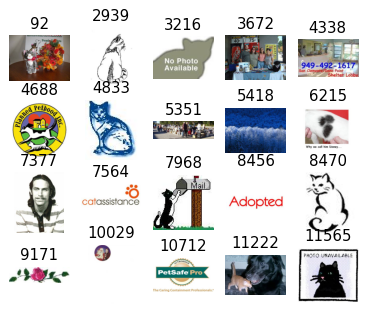

In [84]:
plot_images(bad_cats, bad_cat_ids)

In [85]:
# ce pattern correspond à n'importe quelle chaîne de  caractères contenant ".<chiffres>.", 
# comme dog.666.jpg
pattern = re.compile(r'.*\.(\d+)\..*')

In [107]:
def trash_path(dirname):
    '''retourne le chemin vers le répertoire poubelle 
    (Trash/cats/ ou Trash/dogs/),
    ou les images de mauvais chiens et chats seront déplacées. 
    Notez que ce répertoire ne doit pas être dans cats/ ou dogs/, 
    ou Keras sera quand même capable de les trouver. 
    '''
    return os.path.join('../Trash', dirname)

In [108]:
 def cleanup(ids, dirname): 
  '''déplace dans la poubelle les images de dirname contenant ces indices
  '''
  os.chdir(datasetdir)
  # garde la trace du répertoire courant  
  oldpwd = os.getcwd()
  # on va soit dans cats/ soit dans dogs/ 
  os.chdir(dirname)
  # on crée le répertoire poubelle. 
  # s'il existe, on le supprime et on le recrée.
  trash = trash_path(dirname)
  if os.path.isdir(trash):
    shutil.rmtree(trash)
  os.makedirs(trash, exist_ok=True)
  # boucle sur toutes les images de chiens ou de chats
  fnames = os.listdir()
  for fname in fnames:
    m = pattern.match(fname)
    if m: 
      # extraction de l'indice
      the_id = int(m.group(1))
      if the_id in ids:
        # cet indice correspond effectivement à une image 
        # qu'il faut virer
        print('moving to {}: {}'.format(trash, fname))
        shutil.move(fname, trash)
  # on retourne au répertoire du dataset
  os.chdir(oldpwd)

In [109]:
def restore(dirname):
  '''Restaure les fichiers de la poubelle.
  J'aurai besoin de cette fonction pour ramener ce tutorial à son 
  état initial pour vous. Et vous pourriez en avoir besoin si vous voulez
  tester le réseau sans avoir effectué le toilettage auparavant. 
  '''
  os.chdir(datasetdir)
  oldpwd = os.getcwd()
  os.chdir(dirname)
  trash = trash_path(dirname)
  print(trash)
  for fname in os.listdir(trash):
    fname = os.path.join(trash,fname)
    print('restoring', fname)
    print(os.getcwd())
    shutil.move(fname, os.getcwd())
  os.chdir(oldpwd)

In [110]:
cleanup(bad_cat_ids,'cats')

In [111]:
cleanup(bad_dog_ids, 'dogs')

Chargement du dataset chiens et chats avec keras : 

In [112]:
gen = ImageDataGenerator()

In [141]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('dogs','cats')
)

Found 24957 images belonging to 2 classes.


In [142]:
next(iterator)

(array([[[[ 86.,  77.,  96.],
          [101.,  92., 111.],
          [102.,  93., 112.],
          ...,
          [107.,  95., 115.],
          [115., 103., 123.],
          [116., 104., 124.]],
 
         [[ 99.,  90., 109.],
          [ 98.,  89., 108.],
          [ 89.,  80.,  99.],
          ...,
          [112., 100., 120.],
          [118., 106., 126.],
          [113., 101., 121.]],
 
         [[ 92.,  83., 102.],
          [ 94.,  85., 104.],
          [ 90.,  81., 100.],
          ...,
          [111.,  99., 119.],
          [117., 105., 125.],
          [117., 105., 125.]],
 
         ...,
 
         [[129., 123., 125.],
          [112., 106., 108.],
          [122., 116., 118.],
          ...,
          [151., 143., 141.],
          [146., 138., 136.],
          [137., 129., 127.]],
 
         [[108., 102., 104.],
          [112., 106., 108.],
          [118., 112., 114.],
          ...,
          [148., 140., 138.],
          [150., 142., 140.],
          [146., 138., 136.

In [143]:
# tous les itérateurs python ont une fonction next()
batch = next(iterator)
len(batch)

2

In [144]:
print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [145]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


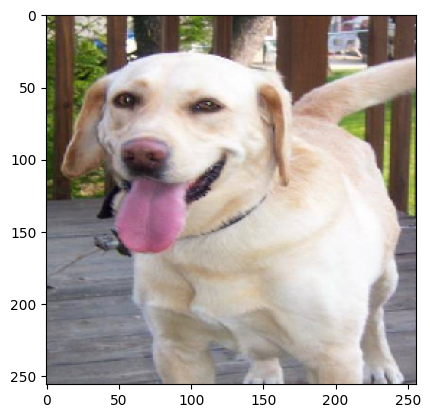

In [148]:

# il faut caster l'image vers un tableau d'entier
# avant de la tracer car imshow prend 
# soit un tableau d'entiers
# soit un tableau de réels entre 0. et 1. 
plt.imshow(batch[0][0].astype(int))

In [149]:
batch[1][0]

array([1., 0.], dtype=float32)

In [153]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'dog' if label[0]>0.5 else 'cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

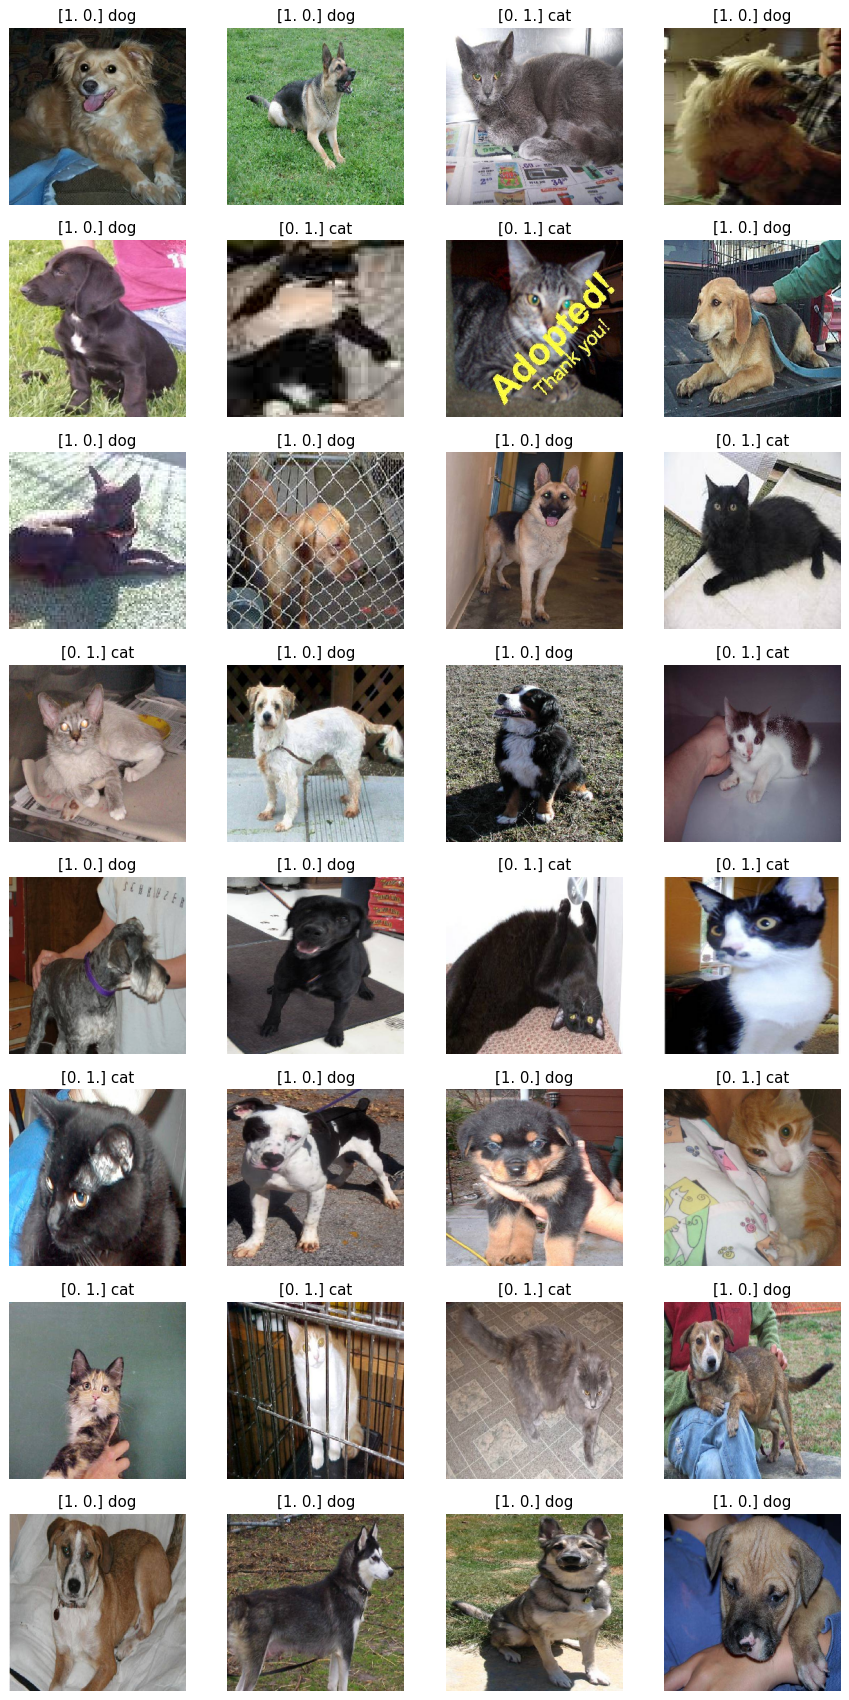

In [154]:
plot_images(next(iterator))

In [155]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [156]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 19967 images belonging to 2 classes.
Found 4990 images belonging to 2 classes.


In [157]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

c:\Users\Lau\Documents\Moi\1-Travail (sept 23)\3- IA\1- Formation Greta\3- Projets\8- Chat-Chien\Environnement\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [162]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=25
)





Epoch 1/25


c:\Users\Lau\Documents\Moi\1-Travail (sept 23)\3- IA\1- Formation Greta\3- Projets\8- Chat-Chien\Environnement\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


666/666 ━━━━━━━━━━━━━━━━━━━━ 922s 1s/step - acc: 0.5795 - loss: 0.7173 - val_acc: 0.7196 - val_loss: 0.5489
Epoch 2/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 910s 1s/step - acc: 0.7195 - loss: 0.5474 - val_acc: 0.7497 - val_loss: 0.5005
Epoch 3/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 893s 1s/step - acc: 0.7581 - loss: 0.4989 - val_acc: 0.7591 - val_loss: 0.4967
Epoch 4/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 895s 1s/step - acc: 0.7788 - loss: 0.4697 - val_acc: 0.7938 - val_loss: 0.4421
Epoch 5/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 3128s 5s/step - acc: 0.8131 - loss: 0.4183 - val_acc: 0.8030 - val_loss: 0.4405
Epoch 6/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - acc: 0.8258 - loss: 0.3924 - val_acc: 0.8273 - val_loss: 0.3891
Epoch 7/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 963s 1s/step - acc: 0.8393 - loss: 0.3665 - val_acc: 0.8182 - val_loss: 0.3950
Epoch 8/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 1009s 2s/step - acc: 0.8496 - loss: 0.3505 - val_acc: 0.8285 - val_loss: 0.3848
Epoch 9/25
666/666 ━━━━━━━━━━━━━━━━━━━━ 1002s 2s/step - a

In [163]:
model.save('model25_epoch.h5')

In [164]:
def plot_history(history, yrange):
    '''Trace le coût et la précision en fonction de l'époque,  pour les échantillons d'entraînement et de validation. 
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # époques
    epochs = range(len(acc))

    # précision en fonction de l'époque
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # coût en fonction de l'époque
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

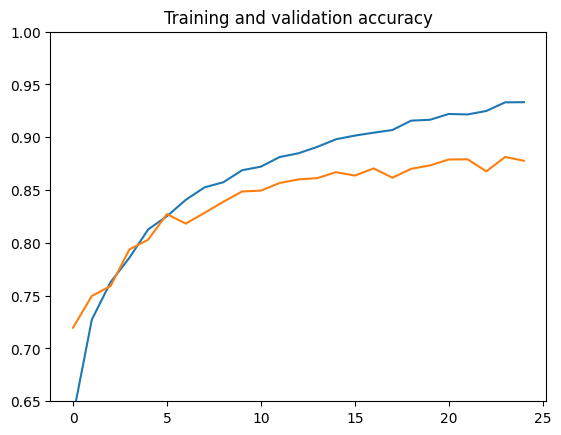

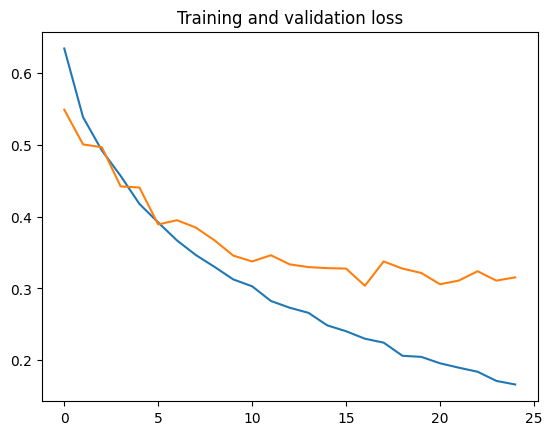

In [165]:
plot_history(history, (0.65, 1.))

In [166]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

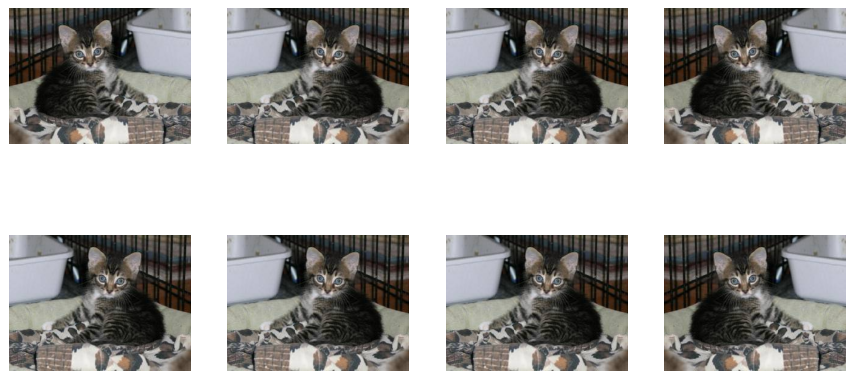

In [167]:
image = img.imread('cats/cat.12.jpg')

def plot_transform():
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

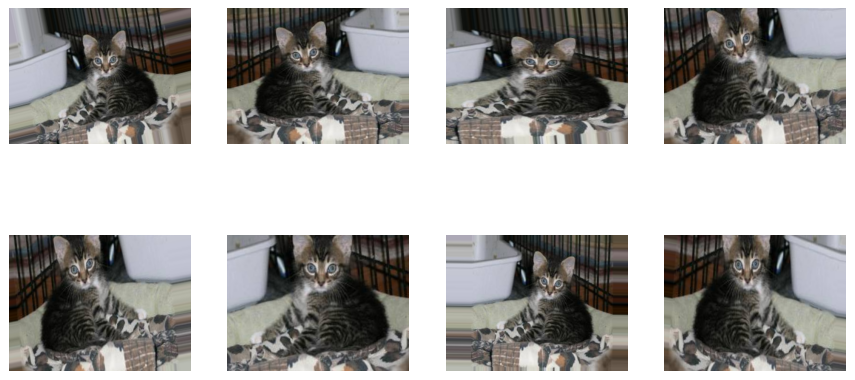

In [168]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [169]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 22463 images belonging to 2 classes.
Found 2494 images belonging to 2 classes.


In [178]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.4) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

c:\Users\Lau\Documents\Moi\1-Travail (sept 23)\3- IA\1- Formation Greta\3- Projets\8- Chat-Chien\Environnement\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [179]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [180]:
history_augm = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    # steps_per_epoch=10,
    epochs=25,
)

Epoch 1/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1198s 2s/step - acc: 0.5897 - loss: 0.6803 - val_acc: 0.7133 - val_loss: 0.5522
Epoch 2/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1137s 2s/step - acc: 0.7139 - loss: 0.5505 - val_acc: 0.7550 - val_loss: 0.5010
Epoch 3/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1151s 2s/step - acc: 0.7587 - loss: 0.4954 - val_acc: 0.7382 - val_loss: 0.5369
Epoch 4/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1232s 2s/step - acc: 0.7822 - loss: 0.4638 - val_acc: 0.7935 - val_loss: 0.4374
Epoch 5/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1256s 2s/step - acc: 0.7982 - loss: 0.4362 - val_acc: 0.8095 - val_loss: 0.4318
Epoch 6/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1246s 2s/step - acc: 0.8154 - loss: 0.4080 - val_acc: 0.7995 - val_loss: 0.4314
Epoch 7/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1153s 2s/step - acc: 0.8283 - loss: 0.3908 - val_acc: 0.8324 - val_loss: 0.3829
Epoch 8/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 1137s 2s/step - acc: 0.8370 - loss: 0.3699 - val_acc: 0.8384 - val_loss: 0.3548
Epoch 9/25
749/749 ━━━━━━━━━━━━━━━━━━━━ 

In [181]:
model.save('model04_augm25_epoch.h5')
model.save('model04_augm25_epoch.keras')

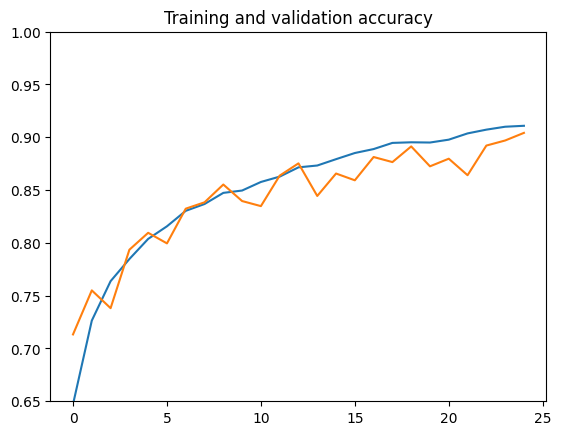

In [182]:
plot_history(history_augm, (0.65, 1))

Utilisation d'un modèle pré-entraîné : ResNet50

In [184]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [185]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds1 = model.predict(x)
    # print the probability and category name for the 5 categories 
    # with highest probability: 
    print('Predicted:', preds1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted: [('n02088238', 'basset', 0.7286558), ('n02088364', 'beagle', 0.21918811), ('n02089867', 'Walker_hound', 0.049400814), ('n02088632', 'bluetick', 0.0009460741), ('n02110806', 'basenji', 0.0002803845)]


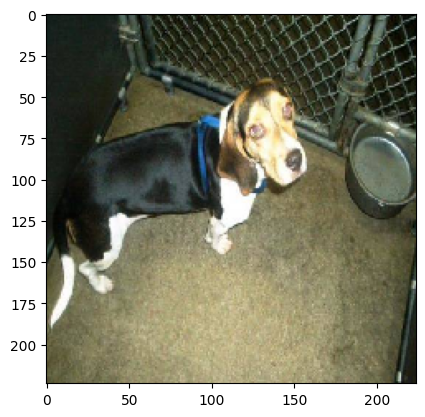

In [189]:
evaluate('dogs/dog.111.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted: [('n02108422', 'bull_mastiff', 0.6389895), ('n02088466', 'bloodhound', 0.21796453), ('n02108089', 'boxer', 0.100492984), ('n02109047', 'Great_Dane', 0.016545003), ('n02087394', 'Rhodesian_ridgeback', 0.012602835)]


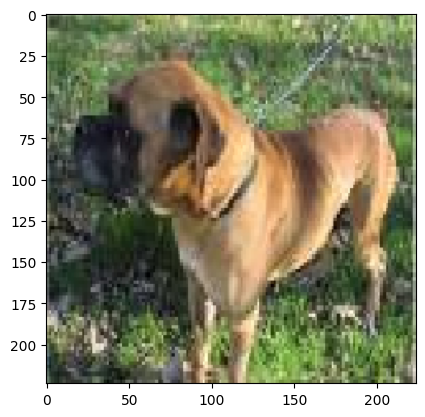

In [188]:
evaluate('dogs/dog.11.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.8903693), ('n02123045', 'tabby', 0.0957196), ('n02123159', 'tiger_cat', 0.0041940385), ('n02127052', 'lynx', 0.0031889377), ('n02123597', 'Siamese_cat', 0.0031806247)]


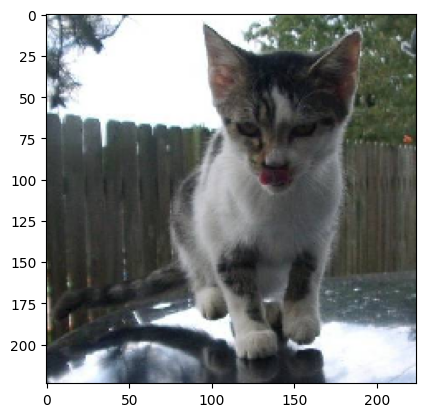

In [190]:
evaluate('cats/cat.11.jpg')